<a href="https://colab.research.google.com/github/karans17s/Practical_Knowledge_Of_Deep-learning/blob/main/ANN_Implementing_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN


DATA PREPROCESSING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data_frame = pd.read_csv('Churn_Modelling.csv')

In [ ]:
data_frame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x = data_frame.iloc[:, 3:13]
y = data_frame.iloc[:, 13]

In [ ]:
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [ ]:
x = pd.concat([x, geography, gender], axis=1)
x = x.drop(['Geography', 'Gender'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

NOW MAKE THE ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
classifier = Sequential()

First add the input layer and first hidden layer h1

In [ ]:
classifier.add(Dense(units = 6 , kernel_initializer = 'he_uniform' , activation = 'relu' , input_dim = 11))
classifier.add(Dense(units = 6 , kernel_initializer = 'he_uniform' , activation = 'relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


FIT THE MODEL

In [ ]:
classifier.compile(optimizer = 'Adamax' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
model_history = classifier.fit(x_train , y_train , validation_split = 0.33 , batch_size = 10 , epochs = 50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5910 - loss: 0.7513 - val_accuracy: 0.7675 - val_loss: 0.5460
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7721 - loss: 0.5386 - val_accuracy: 0.7887 - val_loss: 0.5042
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7920 - loss: 0.5007 - val_accuracy: 0.7921 - val_loss: 0.4872
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7842 - loss: 0.4945 - val_accuracy: 0.7917 - val_loss: 0.4753
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4697 - val_accuracy: 0.7933 - val_loss: 0.4659
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.4622 - val_accuracy: 0.7955 - val_loss: 0.4583
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4386 - val_accuracy: 0.7978 - val_loss: 0.4520
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7961 - loss: 0.4506 - val_accuracy: 0.

In [ ]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


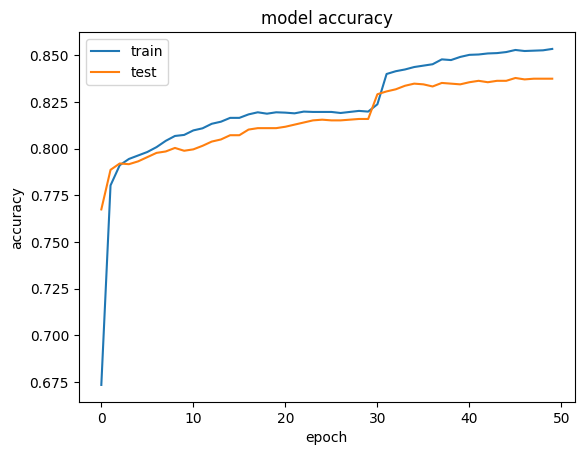

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show()

MAKING PREDICTION AND EVALUATE MODEL

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[1507   88]
 [ 229  176]]


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)
print(score)

0.8415


**Now , if increase the hidden layer + increase hidden nodes....**

in start hidden layer-1 nodes is 6 now increase upto 10 and also use he_normaland also add third hidden layer

In [ ]:
classifier.add(Dense(units = 10 , kernel_initializer = 'he_normal' , activation = 'relu' , input_dim = 11))
classifier.add(Dense(units = 20 , kernel_initializer = 'he_normal' , activation = 'relu'))
classifier.add(Dense(units = 20 , kernel_initializer = 'he_normal' , activation = 'relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.compile(optimizer = 'Adamax' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
model_history = classifier.fit(x_train , y_train , validation_split = 0.33 , batch_size = 10 , epochs = 50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7958 - loss: 0.6246 - val_accuracy: 0.7955 - val_loss: 0.5153
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8041 - loss: 0.4942 - val_accuracy: 0.8076 - val_loss: 0.4501
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8230 - loss: 0.4135 - val_accuracy: 0.8357 - val_loss: 0.3896
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8522 - loss: 0.3677 - val_accuracy: 0.8323 - val_loss: 0.3850
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8477 - loss: 0.3603 - val_accuracy: 0.8372 - val_loss: 0.3844
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8575 - loss: 0.3519 - val_accuracy: 0.8323 - val_loss: 0.3831
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8527 - loss: 0.3522 - val_accuracy: 0.8368 - val_loss: 0.3826
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8532 - loss: 0.3498 - val_accuracy: 0.

In [ ]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


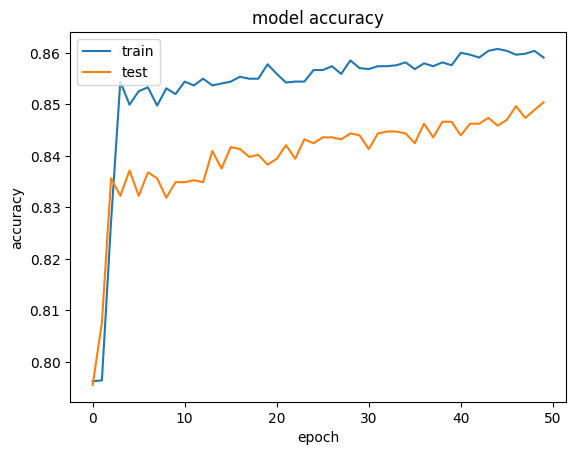

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[1529   66]
 [ 223  182]]


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)
print(score)

0.8555


NOW APPLY DROPOUT RATIO FOR ALL LAYERS...

In [ ]:
classifier.add(Dense(units = 10 , kernel_initializer = 'he_normal' , activation = 'relu' , input_dim = 11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units = 20 , kernel_initializer = 'he_normal' , activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 20 , kernel_initializer = 'he_normal' , activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units = 1 , kernel_initializer = 'glorot_uniform' , activation = 'sigmoid'))
classifier.add(Dropout(0.5))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
classifier.compile(optimizer = 'Adamax' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
model_history = classifier.fit(x_train , y_train , validation_split = 0.33 , batch_size = 10 , epochs = 50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5041 - loss: 3.2669 - val_accuracy: 0.7955 - val_loss: 0.6602
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4799 - loss: 2.8976 - val_accuracy: 0.7955 - val_loss: 0.6320
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5093 - loss: 2.5637 - val_accuracy: 0.7955 - val_loss: 0.6065
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5191 - loss: 2.5677 - val_accuracy: 0.7955 - val_loss: 0.5849
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5539 - loss: 2.3984 - val_accuracy: 0.7955 - val_loss: 0.5652
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5956 - loss: 2.4211 - val_accuracy: 0.7955 - val_loss: 0.5525
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6445 - loss: 2.1420 - val_accuracy: 0.7955 - val_loss: 0.5399
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6733 - loss: 2.0544 - val_accuracy: 0.

In [ ]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


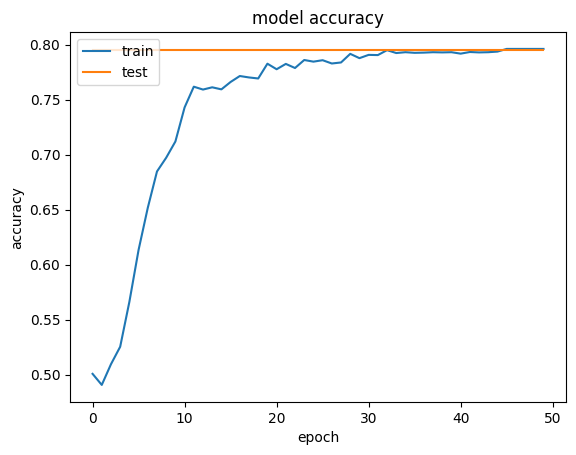

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[1595    0]
 [ 405    0]]


In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)
print(score)

0.7975
